In [2]:
import xarray as xr
import geopandas as gpd
import cartopy.crs as ccrs
import json
import urllib.request
from ipyleaflet import Map, ImageOverlay, GeoJSON, GeoData, projections
import matplotlib.pyplot as plt
from pyproj import Transformer

In [ ]:
hydrobasins_lev05_url = 'https://raw.githubusercontent.com/blackteacatsu/spring_2024_envs_research_amazon_ldas/main/resources/hybas_sa_lev05_areaofstudy.geojson'
with urllib.request.urlopen(hydrobasins_lev05_url) as url:
    geojson = json.loads(url.read().decode()) 

geo_data = GeoJSON(data = geojson, style = {'color' : 'white'}, hover_style={'color': 'white', 'dashArray': '0', 'fillOpacity': 0.5},)

In [13]:
ds = xr.open_dataset('/Users/kris/amazonforcast/data/forecast/output/LIS_HIST_Forecast_June_02_to_05_mean.nc')
# Extract the bounds
lat = ds["lat"].values
lon = ds["lon"].values
#print(bounds)

# Set up transformer to EPSG:3857
# World_Equidistant_Cylindrical, Sphere_Equidistant_Cylindrical, Moon_2000_Equidistant_Cylindrical, WGS 84 / World Equidistant Cylindrical, Mars_2000_Equidistant_Cylindrical_sphere
# World_Plate_Carree, Sphere_Plate_Carree
transformer = Transformer.from_crs("World_Plate_Carree", "EPSG:3857")

# Transform lat/lon coordinates
x_min, y_min = transformer.transform(lon.min(), lat.min())
x_max, y_max = transformer.transform(lon.max(), lat.max())

"""x_min, y_min = -82, -21
x_max, y_max = -49, 6"""

values = ds['Rainf_tavg'].isel(time = 1).values

print(f"Projected bounds: x: ({x_min}, {x_max}), y: ({y_min}, {y_max})")

bounds = [[y_max, x_min], [y_min, x_max]]

print(bounds)

Projected bounds: x: (-81.97497558593749, -49.02502441406249), y: (-20.97500038150753, 5.9750003814706)
[[5.9750003814706, -81.97497558593749], [-20.97500038150753, -49.02502441406249]]


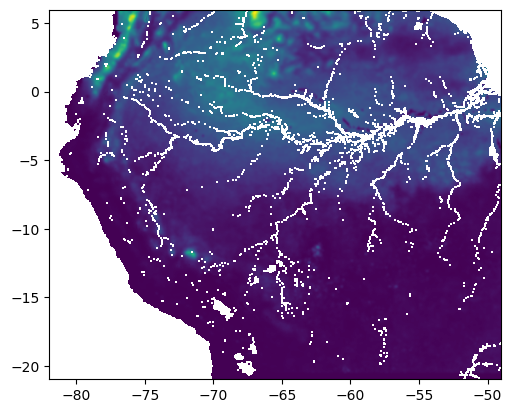

In [59]:
# 3. Plot and save the data
plt.imshow(values, cmap="viridis", extent=(x_min, x_max , y_min, y_max), origin="lower")
plt.axis("on")
plt.savefig("output.png", bbox_inches=0, pad_inches = 0, transparent=True)

In [58]:
# Use the saved image as an overlay
m = Map(center=(-6, -65), zoom=4)
overlay = ImageOverlay(url="output.png", bounds=[[6.9, -83], [-22, -47]])  # Adjust bounds as needed
# m.add(geo_data)
m.add(overlay)
m


Map(center=[-6, -65], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…